## webscrapping news article

### install requests and beautiful soup library

In [1]:
%pip install requests bs4

Note: you may need to restart the kernel to use updated packages.


#### restart and run all cells

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
import requests
from bs4 import BeautifulSoup

In [4]:
url = "https://www.opindia.com/latest-news/?nocache"
data = requests.get(url)
data

<Response [200]>

#### if response is 200 then it is ok

<!DOCTYPE html >

<html lang="en-GB">
<head>
<meta charset="utf-8"/>
<title>Today's Latest English News Reports from India | Archives of OpIndia</title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://www.opindia.com/xmlrpc.php" rel="pingback"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots">
<link href="https://www.opindia.com/latest-news/?nocache" rel="canonical"/><link href="https://www.opindia.com/latest-news/page/2/?nocache" rel="next"/><link href="https://www.opindia.com/wp-content/uploads/2018/10/opindia-logo-300x300.png" rel="icon" type="image/png"/>
<meta content="Latest Breaking News and Opinions from OpIndia.com. List of all news reports and opinions published by OpIndia in a chronological order." name="description"/>
<meta content="en_GB" property="og:locale"/>
<meta content="article" property="og:type"/>
<meta content="Today's Latest English News Reports from India | Arc
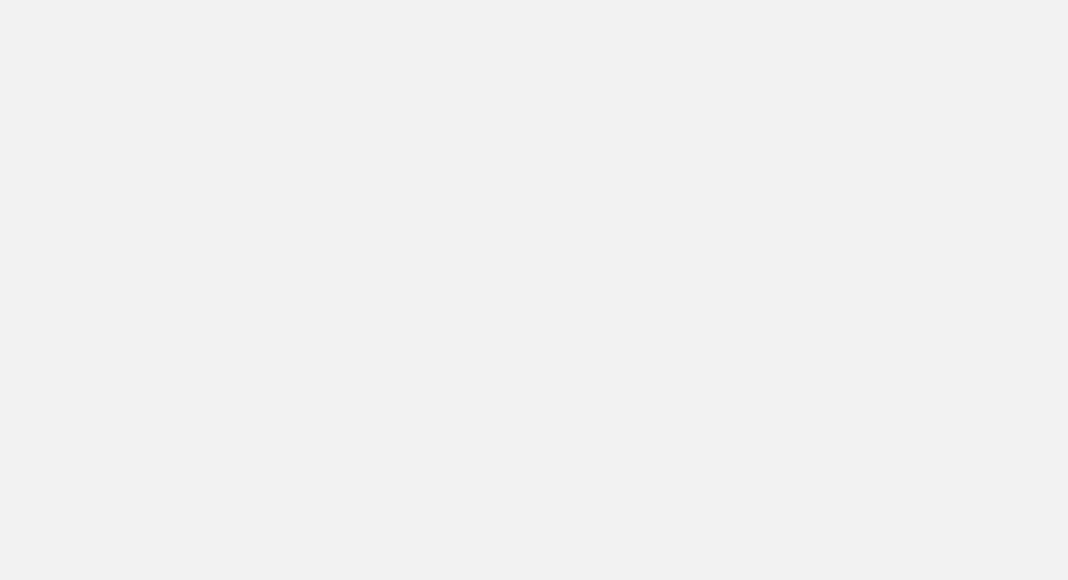

In [5]:
bs = BeautifulSoup(data.content)
bs

In [6]:
headings = bs.find_all('h3', class_="entry-title td-module-title" )
headings

[<h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/10/mumbai-police-arrest-shiv-sena-ubt-member-absconding-drug-mafia-lalit-patil-from-chennai/" rel="bookmark" title="Mumbai police arrest Shiv Sena (UBT) member absconding drug mafia Lalit Patil from Chennai, had fled from a hospital in Pune">Mumbai police arrest Shiv Sena (UBT) member absconding drug mafia Lalit Patil from Chennai, had fled from a hospital in Pune</a></h3>,
 <h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/10/mahuagate-lok-sabha-ethics-committee-nishikant-dubey-jai-anant-to-submit-evidence-against-mahua-moitra/" rel="bookmark" title="MahuaGate: Lok Sabha’s Ethics Committee calls BJP MP Nishikant Dubey and Adv Jai Anant to submit evidence against TMC MP Mahua Moitra">MahuaGate: Lok Sabha’s Ethics Committee calls BJP MP Nishikant Dubey and Adv Jai Anant to submit evidence against TMC MP Mahua Moitra</a></h3>,
 <h3 class="entry-title td-module-title"><a href="https:

#### getting the url for specific news articles

In [7]:
headings[0].find('a').get('href')

'https://www.opindia.com/2023/10/mumbai-police-arrest-shiv-sena-ubt-member-absconding-drug-mafia-lalit-patil-from-chennai/'

#### create a function to fetch all news articles

In [8]:
def  get_news_urls(url):
    data  = requests.get(url)
    bs = BeautifulSoup(data.content)
    headings = bs.find_all('h3', class_= "entry-title td-module-title")
    links = []
    for i in headings:
        s = i.find('a').get('href')
        links.append(s)
    return links

In [9]:
links = get_news_urls(url)
links

['https://www.opindia.com/2023/10/mumbai-police-arrest-shiv-sena-ubt-member-absconding-drug-mafia-lalit-patil-from-chennai/',
 'https://www.opindia.com/2023/10/mahuagate-lok-sabha-ethics-committee-nishikant-dubey-jai-anant-to-submit-evidence-against-mahua-moitra/',
 'https://www.opindia.com/2023/10/high-court-allows-raghav-chadha-petition-review-expulsion-bungalow/',
 'https://www.opindia.com/2023/10/it-raids-contractors-in-karnataka-luxury-watches-gold-and-over-100-crore-cash/',
 'https://www.opindia.com/2023/10/mahua-moitra-asked-questions-against-adani-favour-hiranandani-bribes-list-of-questions/',
 'https://www.opindia.com/2023/10/promotion-of-tribal-cultural-heritage-decolonisation-nation-building-modi-govt-steps/',
 'https://www.opindia.com/2023/10/lessons-hamas-attack-israel-fake-genocide-of-muslims-india-justify-genocide-hindus-language-of-oppressed/',
 'https://www.opindia.com/2023/10/ccommon-enemy-how-the-ummah-ignores-millions-of-muslim-victims-but-gets-together-against-jews

In [10]:
len(links)

104

#### for url fetch news headings

In [11]:
links[0]

'https://www.opindia.com/2023/10/mumbai-police-arrest-shiv-sena-ubt-member-absconding-drug-mafia-lalit-patil-from-chennai/'

In [12]:
data2 = requests.get(links[0])
data2

<Response [200]>

<!DOCTYPE html >

<html lang="en-GB">
<head>
<meta charset="utf-8"/>
<title>Maharashtra: Shiv Sena (UBT) member absconding drug mafia Lalit Patil nabbed</title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://www.opindia.com/xmlrpc.php" rel="pingback"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots">
<link href="https://www.opindia.com/wp-content/uploads/2018/10/opindia-logo-300x300.png" rel="icon" type="image/png"/>
<meta content="Lalit Patil fled from Sassoon Hospital in Pune on 2nd October triggering the deployment of multiple search teams. His drug factory in Nashik was busted by the Mumbai Police. | OpIndia News" name="description"/>
<link href="https://www.opindia.com/2023/10/mumbai-police-arrest-shiv-sena-ubt-member-absconding-drug-mafia-lalit-patil-from-chennai/" rel="canonical">
<meta content="en_GB" property="og:locale"/>
<meta content="article" property="og:type"/>
<meta c
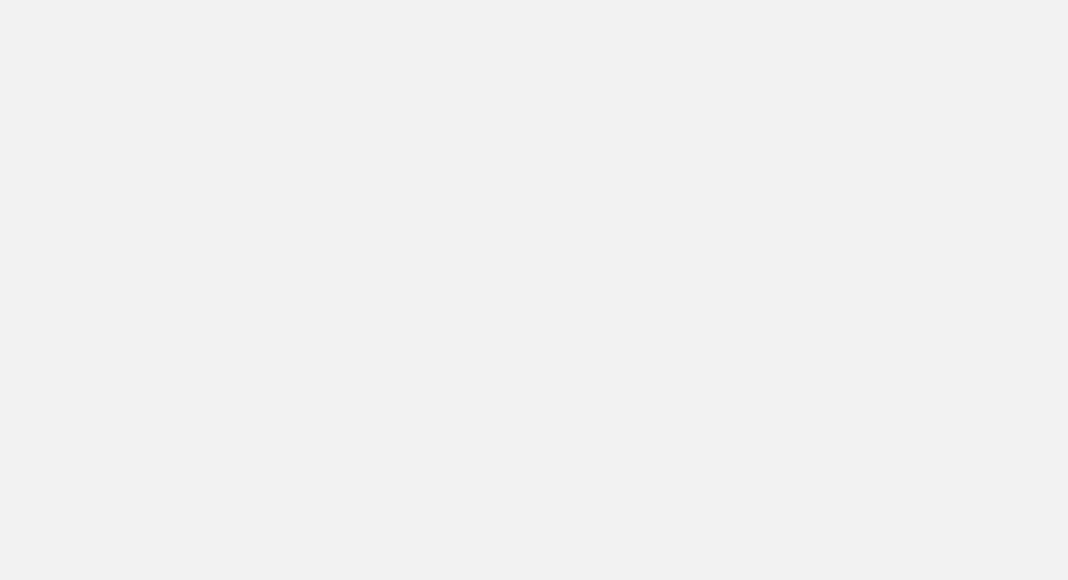

In [13]:
bs2 = BeautifulSoup(data2.content)
bs2

In [14]:
h = bs2.find('h1', class_="tdb-title-text").text
h

'Mumbai police arrest Shiv Sena (UBT) member absconding drug mafia Lalit Patil from Chennai, had fled from a hospital in Pune'

In [15]:
t = bs2.find('time', class_="entry-date updated td-module-date").text
t

'18 October, 2023 '

In [16]:
content = bs2.find_all('p')
content

[<p>Despite these developments, Patil managed to escape at around 8 p.m. on 2nd October, eluding the police while being taken to an X-ray testing appointment. As of now, the police authorities have apprehended four major drug traffickers in connection with the case.</p>,
 <p>Shiv Sena (UBT) member <a href="https://www.opindia.com/tag/drug-mafia/" rel="noreferrer noopener" target="_blank">dr</a><a href="https://www.opindia.com/tag/drug-mafia/">ug mafia</a> Lalit Patil, who had been on the run for 15 days from Sassoon Hospital in Pune, was <a href="https://www.freepressjournal.in/pune/pune-news-absconding-drug-smuggler-lalit-patil-held-by-mumbai-police-in-chennai" rel="noreferrer noopener" target="_blank">arrested</a> by the Mumbai crime branch in Chennai on Tuesday (17th October). Evading both the hospital administration and the police, Lalit Patil managed to escape on 2nd October.</p>,
 <p>The search for him involved both the Pune and Mumbai Police departments. Now that Lalit Patil is 

In [17]:
content[0].text

'Despite these developments, Patil managed to escape at around 8 p.m. on 2nd October, eluding the police while being taken to an X-ray testing appointment. As of now, the police authorities have apprehended four major drug traffickers in connection with the case.'

In [18]:
news = ""
for i in content:
    news = news + i.text

In [19]:
news

"Despite these developments, Patil managed to escape at around 8 p.m. on 2nd October, eluding the police while being taken to an X-ray testing appointment. As of now, the police authorities have apprehended four major drug traffickers in connection with the case.Shiv Sena (UBT) member drug mafia Lalit Patil, who had been on the run for 15 days from Sassoon Hospital in Pune, was arrested by the Mumbai crime branch in Chennai on Tuesday (17th October). Evading both the hospital administration and the police, Lalit Patil managed to escape on 2nd October.The search for him involved both the Pune and Mumbai Police departments. Now that Lalit Patil is in police custody, it is expected that the involvement of several prominent individuals in the drug case will come to light.Mumbai Police detained drug mafia person Lalit Patil. Mumbai Police took him into custody from Chennai. He had escaped from a hospital in Pune and Police were searching for him: Mumbai PoliceLalit Patil fled from Sassoon H

In [20]:
def get_news_details(url):
    data2 = requests.get(url)
    bs2 = BeautifulSoup(data2.content)
    h = bs2.find('h1', class_="tdb-title-text").text
    t = bs2.find('time', class_="entry-date updated td-module-date").text
    cont = bs2.find_all('p')
    news = ""
    for i in cont:
        news = news + i.text
    return h, t, news
    

In [21]:
links[0]

'https://www.opindia.com/2023/10/mumbai-police-arrest-shiv-sena-ubt-member-absconding-drug-mafia-lalit-patil-from-chennai/'

In [22]:
get_news_details(links[0])

('Mumbai police arrest Shiv Sena (UBT) member absconding drug mafia Lalit Patil from Chennai, had fled from a hospital in Pune',
 '18 October, 2023 ',
 "Despite these developments, Patil managed to escape at around 8 p.m. on 2nd October, eluding the police while being taken to an X-ray testing appointment. As of now, the police authorities have apprehended four major drug traffickers in connection with the case.Shiv Sena (UBT) member drug mafia Lalit Patil, who had been on the run for 15 days from Sassoon Hospital in Pune, was arrested by the Mumbai crime branch in Chennai on Tuesday (17th October). Evading both the hospital administration and the police, Lalit Patil managed to escape on 2nd October.The search for him involved both the Pune and Mumbai Police departments. Now that Lalit Patil is in police custody, it is expected that the involvement of several prominent individuals in the drug case will come to light.Mumbai Police detained drug mafia person Lalit Patil. Mumbai Police to

#### saving all the data in in dataframe

In [23]:
import pandas as pd
def get_news_datadrames(url):
    links = get_news_urls(url)
    date = []
    title = []
    article = []
    for i in links:
        h, t, news = get_news_details(i)
        title.append(h)
        date.append(t)
        article.append(news)
        #creating dictionary
    dct = {'date' : date,
           'heading' : title,
           'article' : news,
           'url' :links}
    # creading dataframes
    df = pd.DataFrame(dct)
    return df



In [24]:
url

'https://www.opindia.com/latest-news/?nocache'

In [25]:
df = get_news_datadrames(url)
df

,date,heading,article,url
0,"18 October, 2023",Mumbai police arrest Shiv Sena (UBT) member ab...,The legal notice was sent after BJP MP Nishika...,https://www.opindia.com/2023/10/mumbai-police-...
1,"18 October, 2023",MahuaGate: Lok Sabha’s Ethics Committee calls ...,The legal notice was sent after BJP MP Nishika...,https://www.opindia.com/2023/10/mahuagate-lok-...
2,"17 October, 2023",High Court allows Raghav Chadha’s petition to ...,The legal notice was sent after BJP MP Nishika...,https://www.opindia.com/2023/10/high-court-all...
3,"17 October, 2023","Luxury watches, gold, and over 100 crore unacc...",The legal notice was sent after BJP MP Nishika...,https://www.opindia.com/2023/10/it-raids-contr...
4,"17 October, 2023",Mahua Moitra asked questions against Adani to ...,The legal notice was sent after BJP MP Nishika...,https://www.opindia.com/2023/10/mahua-moitra-a...
...,...,...,...,...
99,"17 October, 2023",Israeli Air Force strikes Hezbollah buildings ...,The legal notice was sent after BJP MP Nishika...,https://www.opindia.com/2023/10/israeli-air-fo...
100,"17 October, 2023","Brussels terrorist attack: ISIS terrorist, who...",The legal notice was sent after BJP MP Nishika...,https://www.opindia.com/2023/10/brussels-isis-...
101,"16 October, 2023",Jilted ex’s lies: Mahua Moitra posts cryptic m...,The legal notice was sent after BJP MP Nishika...,https://www.opindia.com/2023/10/mahua-moitra-c...
102,"16 October, 2023","Mani Shankar Aiyar, Danish Ali among oppositio...",The legal notice was sent after BJP MP Nishika...,https://www.opindia.com/2023/10/mani-shankar-a...


#### save this file to csv files

In [26]:
df.to_csv('opindndianews.csv')